In [1]:
# extract dataset
from zipfile import ZipFile

dataset = "dogs-vs-cats.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()

In [2]:
# extract dataset
from zipfile import ZipFile

dataset = "train.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()

In [3]:
# counting the number of files
import os
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print("total gambar", file_count)

file_names = os.listdir('train')
print(file_names)

total gambar 25000
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.j

In [4]:
# import dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

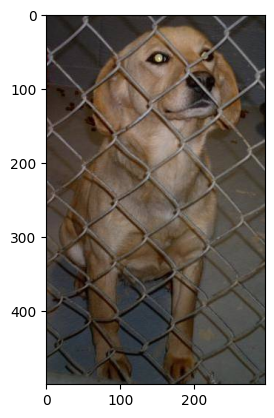

In [5]:
# display dog image
img = mpimg.imread('train/dog.5949.jpg')
imgplt = plt.imshow(img)
plt.show()

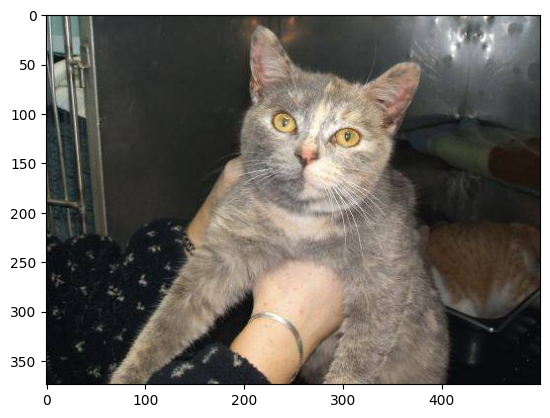

In [6]:
# display cat image
img = mpimg.imread('train/cat.5949.jpg')
imgplt = plt.imshow(img)
plt.show()

In [7]:
# make new folder
os.mkdir('train resized')

In [8]:
# resize image
original_folder = 'train/'
resized_folder = 'train resized/'

dog_count = 0
cat_count = 0

for i in range(len(os.listdir(original_folder))):
    file_name = os.listdir(original_folder)[i]
    
    if file_name[0:3] == 'cat' :
        cat_count += 1
        if cat_count <= 1000 :
            img_path = original_folder+file_name
            img = Image.open(img_path)
            img = img.resize((224, 224))
            img = img.convert('RGB')

            newImgPath = resized_folder+file_name
            img.save(newImgPath)
    else :
        dog_count += 1
        if dog_count <= 1000 :
            img_path = original_folder+file_name
            img = Image.open(img_path)
            img = img.resize((224, 224))
            img = img.convert('RGB')

            newImgPath = resized_folder+file_name
            img.save(newImgPath)

print(dog_count, cat_count)

12500 12500


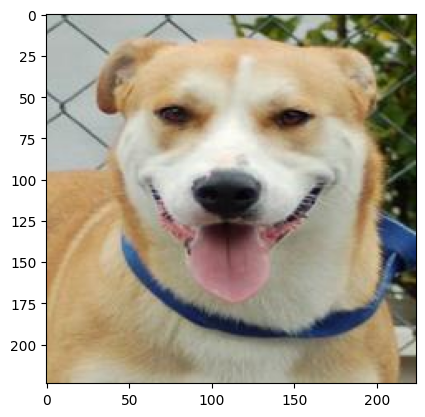

In [9]:
# display resized dog image
img = mpimg.imread('train resized/dog.1034.jpg')
imgplt = plt.imshow(img)
plt.show()

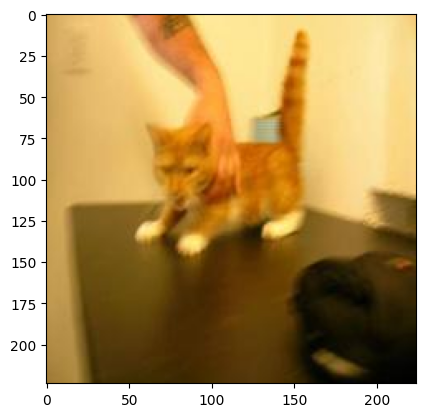

In [10]:
# display resized cat image
img = mpimg.imread('train resized/cat.0.jpg')
imgplt = plt.imshow(img)
plt.show()

In [11]:
# labeling resized image dog = 1, cat = 0
labels = []
file_names = os.listdir('train resized')

for i in range(len(file_names)):
    file_name = file_names[i]
    label = file_name[0:3]
    
    if label == 'dog':
        labels.append(1)
    else :
        labels.append(0)
        
print(labels[0:5])
print(file_names[0:5])

[0, 0, 0, 0, 0]
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']


In [12]:
# convert resized image to numpy arrays
import cv2
import glob

image_dir = 'train resized/*.*'

files = []

files.extend(glob.glob(image_dir))

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

print(dog_cat_images)
print(dog_cat_images.shape)
type(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [122 200 246]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [123 202 245]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [123 202 245]
   [123 202 245]]

  ...

  [[ 55 123 160]
   [ 55 123 160]
   [ 56 124 161]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 53 121 158]
   [ 54 122 159]
   [ 55 123 160]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 52 120 157]
   [ 52 120 157]
   [ 53 121 158]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [185 205 210]
   [171 197 204]
   [163 192 201]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [180 200 205]
   [169 195 202]
   [166 195 204]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [172 192 197]
   [167 193 200]
   [170 199

numpy.ndarray

In [13]:
X = dog_cat_images
Y = np.asarray(labels)

In [14]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [15]:
# 1600 training 
# 400 test

In [16]:
# scaling the data
x_train_scaled = X_train/255
x_test_scaled = X_test/255

print(x_train_scaled)
print(x_test_scaled)

[[[[0.43529412 0.4627451  0.49803922]
   [0.43137255 0.45882353 0.49411765]
   [0.4627451  0.48235294 0.51764706]
   ...
   [0.98431373 0.98431373 0.98431373]
   [0.98823529 0.99215686 0.98431373]
   [0.98823529 0.99215686 0.97647059]]

  [[0.22745098 0.25490196 0.29019608]
   [0.22352941 0.25098039 0.28627451]
   [0.25490196 0.2745098  0.30980392]
   ...
   [0.98823529 0.98823529 0.98823529]
   [0.99215686 0.99607843 0.98823529]
   [0.99215686 0.99607843 0.98039216]]

  [[0.21568627 0.23529412 0.27058824]
   [0.21176471 0.23137255 0.26666667]
   [0.24705882 0.25490196 0.29411765]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 1.         0.99215686]
   [1.         1.         0.98823529]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [1.         0.99607843 1.        ]
   [1.         0.99607843 1.        ]]

  [[0.99215686 0.99215686 0.99215686]
   [0.9

In [18]:
# build neural network
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [20]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [22]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [23]:
model.fit(x_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 22s 345ms/step - loss: 0.1893 - acc: 0.9237
Epoch 2/5
50/50 [==============================] - 17s 348ms/step - loss: 0.0685 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 17s 345ms/step - loss: 0.0498 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 17s 342ms/step - loss: 0.0389 - acc: 0.9925
Epoch 5/5
50/50 [==============================] - 17s 333ms/step - loss: 0.0329 - acc: 0.9925


In [24]:
score, acc = model.evaluate(x_test_scaled, Y_test)
print("Score : ", score)
print("Accuracy : ", acc)

13/13 [==============================] - 5s 327ms/step - loss: 0.0599 - acc: 0.9850
Score :  0.05994470417499542
Accuracy :  0.98499995470047


Path of the ImageD:\Kuliah\Semester 6\Image Processing\Cat vs Dog\Transfer Learning, MobileNet\test1\test1\2.jpg


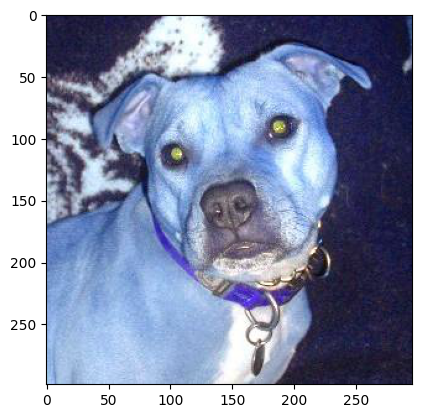

1/1 [==============================] - 1s 605ms/step
[[-3.7254634  3.8133054]]
1
Dog


In [26]:
# predictive system
input_image_path = input("Path of the Image")
input_image = cv2.imread(input_image_path)
# cv2.imshow(input_image)

imgplt = plt.imshow(input_image)
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_prod_label = np.argmax(input_prediction)
print(input_prod_label)

if input_prod_label == 0 :
    print('Cat')
else :
    print('Dog')